In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data", header=None,
                names=['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 
                       'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE',
                       'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'])
df = pd.DataFrame(data)

In [4]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,?,200,4.0,?,1


In [9]:
def replace_missing(df):
    for i, j in df.iterrows():
        ct = 0 
        for col in j:
            if(col == '?'):
                df.iloc[i,ct] = np.nan
            ct += 1
    return df

In [10]:
df_new = replace_missing(df)

In [11]:
print(df['AGE'].min())
print(df['AGE'].max())
print(df['AGE'].count())

7
78
155


Count values in each columns

In [12]:
df.count(0)

Class              155
AGE                155
SEX                155
STEROID            154
ANTIVIRALS         155
FATIGUE            154
MALAISE            154
ANOREXIA           154
LIVER BIG          145
LIVER FIRM         144
SPLEEN PALPABLE    150
SPIDERS            150
ASCITES            150
VARICES            150
BILIRUBIN          149
ALK PHOSPHATE      126
SGOT               151
ALBUMIN            139
PROTIME             88
HISTOLOGY          155
dtype: int64

Count values in each rows

In [13]:
df.count(1)

0      19
1      19
2      19
3      19
4      18
       ..
150    19
151    19
152    19
153    20
154    20
Length: 155, dtype: int64

Create dictionary of Age data

In [15]:
age_col = df['AGE']
age_data = {}
for x in age_col:
    age_data[x] = age_data.get(x, 0) + 1

Get age and each frequency into arrays

In [17]:
ages = []
freq = []
for i in age_data:
    ages.append(i)
    freq.append(age_data.get(i))
ages[:5]

[30, 50, 78, 31, 34]

In [18]:
freq[:5]

[8, 6, 1, 4, 8]

Plot Bar Graph

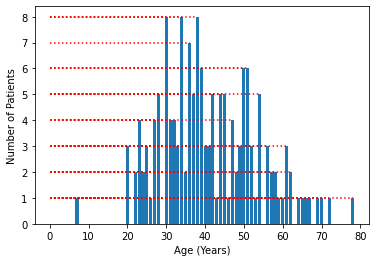

In [19]:
x = ages
y = freq
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i], color="red", linestyle=':') # Here you are drawing the horizontal lines
plt.show()

In [20]:
age_col = df['AGE']
sex_col = df['SEX']
age_col[:10]

0    30
1    50
2    78
3    31
4    34
5    34
6    51
7    23
8    39
9    30
Name: AGE, dtype: int64

In [21]:
def count_elements(arr):
    # initializing dict to store frequency of each element
    elements_count = {}
    # iterating over the elements for frequency
    for element in arr:
        # checking whether it is in the dict or not
        if element in elements_count:
          # incerementing the count by 1
          elements_count[element] += 1
        else:
          # setting the count to 1
          elements_count[element] = 1
    # printing the elements frequencies
    #for key, value in elements_count.items():
    #    print(f"{key}: {value}")
    return elements_count

In [22]:
m_f_counts = count_elements(sex_col)
m_f_counts

{2: 16, 1: 139}

In [23]:
x = m_f_counts.get(1,0)
y = m_f_counts.get(2,0)
print(x,y)

139 16


In [24]:
sorted(age_col)[:5]

[7, 20, 20, 20, 22]

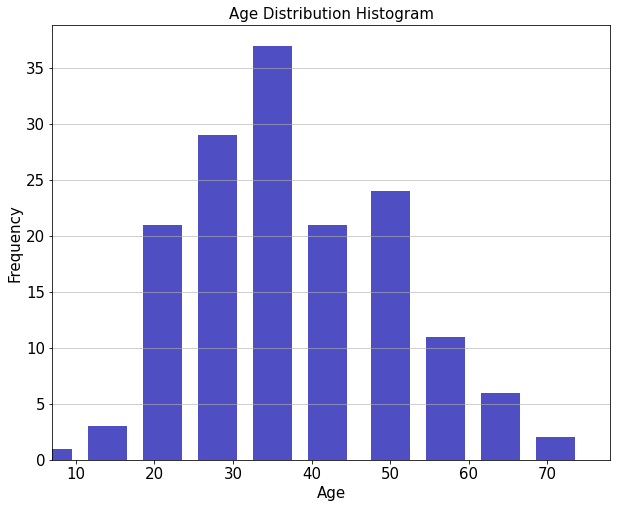

In [25]:
# Creating histogram 
np_hist = age_col
hist,bin_edges = np.histogram(np_hist)
bin_edges = np.round(bin_edges,0)
plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist, width = 5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.grid(axis='y', alpha=0.75) 
plt.xlabel('Age',fontsize=15) 
plt.ylabel('Frequency',fontsize=15) 
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.ylabel('Frequency',fontsize=15) 
plt.title('Age Distribution Histogram',fontsize=15) 
plt.show()

In [26]:
hist

array([ 1,  3, 21, 29, 37, 21, 24, 11,  6,  2], dtype=int64)

In [27]:
bin_edges

array([ 7., 14., 21., 28., 35., 42., 50., 57., 64., 71., 78.])

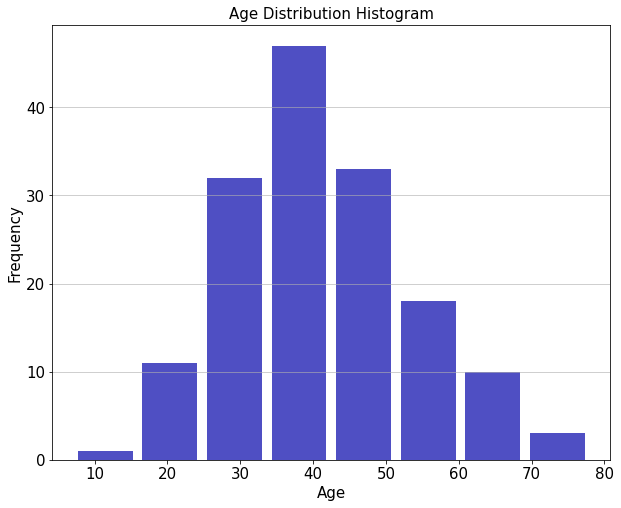

In [28]:
plt.figure(figsize=[10,8]) 
n, bins, patches = plt.hist(x=np_hist, bins=8, color='#0504aa',alpha=0.7, rwidth=0.85) 
plt.grid(axis='y', alpha=0.75) 
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15) 
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.ylabel('Frequency',fontsize=15) 
plt.title('Age Distribution Histogram',fontsize=15) 
plt.show()

In [22]:
n

array([ 1., 11., 32., 47., 33., 18., 10.,  3.])

In [23]:
bins

array([ 7.   , 15.875, 24.75 , 33.625, 42.5  , 51.375, 60.25 , 69.125,
       78.   ])

In [24]:
m_age = {}
f_age = {}
ct_m = 0
ct_f = 0
ct = 0

for x in age_col:
    sex = sex_col.get(x, 0)      
    if sex == 1: 
        m_age[ct_m] = age_col.get(x, 0)
        ct_m += 1
    else:
        f_age[ct_f] = age_col.get(x, 0)
        ct_f += 1
    ct += 1

In [33]:
m_age

{0: 39,
 1: 39,
 2: 34,
 3: 62,
 4: 35,
 5: 35,
 6: 39,
 7: 42,
 8: 65,
 9: 39,
 10: 65,
 11: 23,
 12: 39,
 13: 42,
 14: 56,
 15: 52,
 16: 42,
 17: 42,
 18: 31,
 19: 62,
 20: 33,
 21: 27,
 22: 38,
 23: 64,
 24: 32,
 25: 39,
 26: 65,
 27: 32,
 28: 23,
 29: 49,
 30: 37,
 31: 42,
 32: 33,
 33: 27,
 34: 44,
 35: 42,
 36: 34,
 37: 35,
 38: 61,
 39: 61,
 40: 23,
 41: 42,
 42: 65,
 43: 65,
 44: 34,
 45: 52,
 46: 39,
 47: 35,
 48: 39,
 49: 49,
 50: 28,
 51: 23,
 52: 38,
 53: 34,
 54: 30,
 55: 65,
 56: 34,
 57: 35,
 58: 39,
 59: 23,
 60: 39,
 61: 64,
 62: 35,
 63: 35,
 64: 61,
 65: 42,
 66: 23,
 67: 39,
 68: 57,
 69: 32,
 70: 61,
 71: 34,
 72: 39,
 73: 42,
 74: 42,
 75: 39,
 76: 33,
 77: 44,
 78: 52,
 79: 39,
 80: 34,
 81: 37,
 82: 36,
 83: 31,
 84: 39,
 85: 27,
 86: 37,
 87: 28,
 88: 30,
 89: 23,
 90: 33,
 91: 44,
 92: 28,
 93: 23,
 94: 44,
 95: 39,
 96: 32,
 97: 30,
 98: 34,
 99: 33,
 100: 39,
 101: 35,
 102: 61,
 103: 39,
 104: 30,
 105: 30,
 106: 30,
 107: 62,
 108: 36,
 109: 51,
 110: 42,


In [25]:
m = []
for x in range(len(m_age)):
    m.append(m_age.get(x, 1))
m[:5]

[39, 39, 34, 62, 35]

In [34]:
f_age

{0: 41,
 1: 28,
 2: 58,
 3: 58,
 4: 20,
 5: 22,
 6: 26,
 7: 20,
 8: 20,
 9: 20,
 10: 41,
 11: 41,
 12: 58,
 13: 25,
 14: 41,
 15: 26,
 16: 45,
 17: 28,
 18: 58,
 19: 28,
 20: 26,
 21: 25,
 22: 22,
 23: 20,
 24: 28,
 25: 22}

In [26]:
f = []
for x in range(len(f_age)):
    f.append(f_age.get(x, 1))
f[:5]

[41, 28, 58, 58, 20]

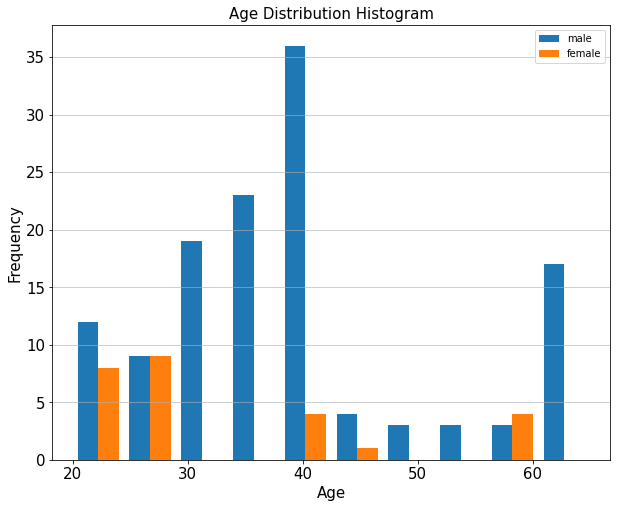

In [27]:
plt.figure(figsize=[10,8]) 
n, bins, patches = plt.hist([m, f]) 
plt.grid(axis='y', alpha=0.75) 
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15) 
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.ylabel('Frequency',fontsize=15) 
#plt.label('$m = male', '$f = female')
plt.title('Age Distribution Histogram',fontsize=15) 
labels= ["male","female"]
plt.legend(labels)
plt.show()

In [28]:
sort_m_age = sorted(m_age.items(), key=lambda x: x[1], reverse=False)
sort_m_age[:5]

[(11, 23), (28, 23), (40, 23), (51, 23), (59, 23)]

In [29]:
sort_f_age = sorted(f_age.items(), key=lambda x: x[1], reverse=False)
sort_f_age[:5]

[(4, 20), (7, 20), (8, 20), (9, 20), (23, 20)]

In [30]:
n

array([[12.,  9., 19., 23., 36.,  4.,  3.,  3.,  3., 17.],
       [ 8.,  9.,  0.,  0.,  4.,  1.,  0.,  0.,  4.,  0.]])

In [31]:
bins

array([20. , 24.5, 29. , 33.5, 38. , 42.5, 47. , 51.5, 56. , 60.5, 65. ])

In [32]:
patches

<a list of 2 BarContainer objects>